In [1]:
import math
import numpy as np
import os
import pandas as pd

from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import VotingClassifier

from sklearn.decomposition import PCA

In [2]:
def get_lines_from_file(filename):
    f=open(filename)
    lines=[x.strip() for x in f]
    f.close()
    return lines

In [3]:
rgbWords  = ['yellow','blue','purple', 'orange','red','green']
shapeWords  = ['cylinder','cube', 'triangle','triangular','rectangular']
objWords = ['cylinder', 'apple','carrot', 'lime','lemon','orange', 'banana','cube', 'triangle', 'corn','cucumber', 'half', 'cabbage', 'ear', 'tomato', 'potato', 'cob','eggplant']

In [4]:
def get_deviations(filename,words):
    lines=get_lines_from_file("/Users/adithyabandi/_True_True_90_25_rgb_0_min_max.txt")
    tokens=[]
    mins=[]
    maxs=[]
    reqmins=[]
    reqmaxs=[]
    for line in lines:
        temp=line.split("_")
        tokens.append(temp[1])
        mins.append(temp[3])
        maxs.append(temp[5])
    for i in range(len(tokens)):
        if tokens[i] in words:
            reqmins.append(mins[i])
            reqmaxs.append(maxs[i])
    return reqmins,reqmaxs    

In [5]:
def get_report(filename):
    lines=get_lines_from_file(filename)
    j=0
    types=[]
    estops=[]
    sorts=[]
    pre_thres=[]
    rec_thres=[]
    split=[]
    acc=[]
    pre=[]
    rec=[]
    f1=[]
    min_means=[]
    min_medians=[]
    min_std_devs=[]
    max_means=[]
    max_medians=[]
    max_std_devs=[]
    i=0
    while i<len(lines):
        mins_agg=[]
        maxs_agg=[]
        for counter in range(4):
            if(lines[i]=="done"):
                i+=1
                break
            mins_str=lines[i].split("]")[0].split("[")[1].split(",")
            mins=[float(per_min) for per_min in mins_str]
            for mini in mins:
                mins_agg.append(mini)
            i+=1
            maxs_str=lines[i].split("]")[0].split("[")[1].split(",")
            maxs=[float(per_max) for per_max in maxs_str]
            for maxi in maxs:
                maxs_agg.append(maxi)
            i+=1
            g=lines[i]
            #print(lines[i])
            temp=g.split("-")
            sorts.append(temp[0])
            types.append(temp[1])
            estops.append(temp[2])
            pre_thres.append(temp[3])
            rec_thres.append(temp[4])
            split.append(temp[5])
            i+=2
            acc.append(float(lines[i])*100)
            i+=1
            f1.append(float(lines[i])*100)
            i+=1
            pre.append(float(lines[i])*100)
            i+=1
            rec.append(float(lines[i])*100)
            i+=2
            j+=1
        for counter in range(4):
            min_means.append(np.mean(mins_agg))
            min_medians.append(np.median(mins_agg))
            min_std_devs.append(np.std(mins_agg))
            max_means.append(np.mean(maxs_agg))
            max_medians.append(np.median(maxs_agg))
            max_std_devs.append(np.std(maxs_agg))
        
    Results=pd.DataFrame({'type':types,'early_stop':estops,
                      'pre_threshold':pre_thres,
                       'rec_threshold':rec_thres,'instances_sorted':sorts,
                          'precision':pre,'recall':rec,
                        'f1_score':f1,
                       'split':split,'accuracy':acc,#})
                       "mean_min_dissim_":min_means,"median_min_dissim_":min_medians,
                        "std_dev_min_dissim_":min_std_devs,
                        "mean_max_dissim_":max_means,
                        "median_max_dissim_":max_medians,
                        "std_dev_max_dissim_":max_std_devs})
    return Results

In [6]:
Results=get_report("/Users/adithyabandi/TM51_AllExecutionI.csv")
#Results

In [7]:
Results=Results[['instances_sorted','early_stop','type','split','pre_threshold', 'rec_threshold', 
                'f1_score','precision','recall','accuracy','mean_max_dissim_', 'mean_min_dissim_', 
                'median_max_dissim_','median_min_dissim_','std_dev_max_dissim_', 'std_dev_min_dissim_']]

In [8]:
#Results.groupby(["instances_sorted",'early_stop','type','pre_threshold','rec_threshold']).mean().sort_values(by=["f1_score"],ascending=False)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
def display_results(Results,feature_type,early_stop,instance_sort):
    object_Results=Results[Results.type==feature_type]
    object_Results=object_Results[object_Results.early_stop==early_stop]
    object_Results=object_Results[object_Results.instances_sorted==instance_sort]
    object_Results_grouped=object_Results.groupby(["instances_sorted",'early_stop','type','pre_threshold','rec_threshold'])
    display(pd.DataFrame(object_Results_grouped.mean().reset_index()).sort_values(by=["f1_score"],ascending=False))
    object_Results_grouped_df=object_Results_grouped.aggregate(np.mean)
    object_Results_grouped_df=object_Results_grouped_df.reset_index()
    data_pivoted = object_Results_grouped_df[(object_Results_grouped_df.early_stop==early_stop) & (object_Results_grouped_df.instances_sorted==instance_sort)].pivot("pre_threshold", "rec_threshold", "f1_score")
    ax = sns.heatmap(data_pivoted)
    plt.show()

With instances sorted as True
With Early Stop set as True
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
5,True,True,rgb,50,50,92.521825,94.756944,92.916667,94.062500,89.209764,8.088750,89.255134,3.624307,0.222538,17.289661
1,True,True,rgb,25,50,92.388889,93.159722,93.958333,94.645833,89.209764,8.088750,89.255134,3.624307,0.222538,17.289661
4,True,True,rgb,50,25,91.577381,92.187500,93.611111,93.680556,89.209764,8.088750,89.255134,3.624307,0.222538,17.289661
0,True,True,rgb,25,25,90.851190,90.138889,94.861111,93.027778,89.209764,8.088750,89.255134,3.624307,0.222538,17.289661
2,True,True,rgb,25,75,90.199405,90.416667,94.027778,91.145833,89.209764,18.783754,89.255134,4.031765,0.222538,31.389239
7,True,True,rgb,50,90,89.279762,88.236111,95.277778,89.229167,89.209764,48.475963,89.255134,73.970151,0.222538,40.870926
15,True,True,rgb,90,90,89.164683,88.395833,95.277778,88.673611,89.209764,56.678008,89.255134,86.416440,0.222538,40.029801
6,True,True,rgb,50,75,89.147817,87.784722,94.583333,90.347222,89.209764,18.783754,89.255134,4.031765,0.222538,31.389239
8,True,True,rgb,75,25,88.354167,88.201389,93.194444,89.722222,89.209764,28.748216,89.255134,7.644718,0.222538,36.829310
3,True,True,rgb,25,90,88.208333,86.979167,94.652778,88.513889,89.209764,48.475963,89.255134,73.970151,0.222538,40.870926


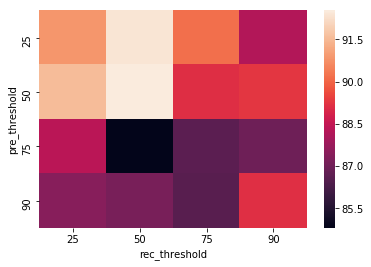

With instances sorted as True
With Early Stop set as False
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
11,True,False,rgb,75,90,93.013889,93.173611,94.930556,94.673611,89.209764,32.770385,89.255134,6.783289,0.222538,36.978957
9,True,False,rgb,75,50,92.697421,92.402778,96.180556,92.958333,89.209764,11.788612,89.255134,3.624307,0.222538,23.535600
3,True,False,rgb,25,90,92.343254,92.222222,94.861111,93.333333,89.209764,30.432521,89.255134,6.783289,0.222538,35.076838
6,True,False,rgb,50,75,92.152778,92.604167,94.097222,94.458333,89.209764,8.088750,89.255134,3.624307,0.222538,17.289661
1,True,False,rgb,25,50,92.109127,92.013889,95.208333,93.125000,89.209764,8.088750,89.255134,3.624307,0.222538,17.289661
2,True,False,rgb,25,75,91.712302,92.048611,93.888889,93.548611,89.209764,8.088750,89.255134,3.624307,0.222538,17.289661
7,True,False,rgb,50,90,91.521825,91.388889,94.305556,93.263889,89.209764,30.432521,89.255134,6.783289,0.222538,35.076838
4,True,False,rgb,50,25,90.815476,91.041667,93.958333,93.048611,89.209764,8.088750,89.255134,3.624307,0.222538,17.289661
8,True,False,rgb,75,25,90.811508,90.604167,94.444444,91.972222,89.209764,11.788612,89.255134,3.624307,0.222538,23.535600
0,True,False,rgb,25,25,90.610119,89.590278,95.416667,91.986111,89.209764,8.088750,89.255134,3.624307,0.222538,17.289661


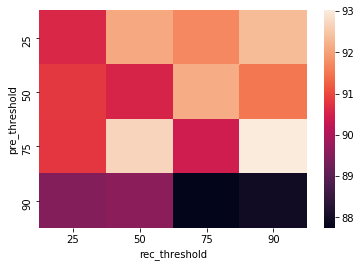

With instances sorted as False
With Early Stop set as True
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
5,False,True,rgb,50,50,92.765873,93.541667,94.652778,93.951389,89.209764,8.088750,89.255134,3.624307,0.222538,17.289661
1,False,True,rgb,25,50,92.375992,90.666667,97.361111,93.277778,89.209764,8.088750,89.255134,3.624307,0.222538,17.289661
0,False,True,rgb,25,25,92.240079,91.805556,95.347222,94.277778,89.209764,8.088750,89.255134,3.624307,0.222538,17.289661
4,False,True,rgb,50,25,90.724206,90.729167,93.819444,91.756944,89.209764,8.088750,89.255134,3.624307,0.222538,17.289661
10,False,True,rgb,75,75,90.426587,89.104167,95.416667,90.666667,86.425444,17.140479,89.226483,5.611256,12.918303,26.698322
8,False,True,rgb,75,25,89.986111,88.236111,96.319444,88.930556,88.908312,18.763937,89.169182,5.611256,1.201827,29.296970
2,False,True,rgb,25,75,89.639881,90.770833,92.361111,91.062500,89.207376,11.309897,89.255134,3.624307,0.224184,23.243592
6,False,True,rgb,50,75,89.250000,87.618056,95.625000,90.562500,89.073634,14.413291,89.226483,3.624307,0.477156,28.126319
9,False,True,rgb,75,50,88.860119,88.298611,93.819444,91.097222,88.951292,9.169094,89.226483,3.624307,1.203441,17.769699
7,False,True,rgb,50,90,88.365079,85.770833,96.458333,88.604167,88.062943,17.047019,89.169182,5.611256,5.021369,24.148254


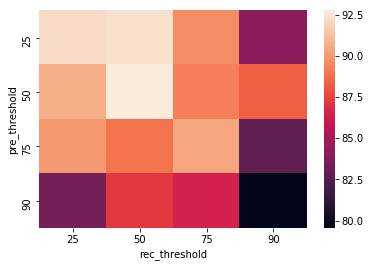

With instances sorted as False
With Early Stop set as False
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
7,False,False,rgb,50,90,92.562500,91.312500,97.013889,92.569444,89.040151,21.914291,89.226483,4.031765,0.629469,31.192366
0,False,False,rgb,25,25,92.130952,92.534722,94.375000,94.368056,89.209764,8.088750,89.255134,3.624307,0.222538,17.289661
6,False,False,rgb,50,75,91.702381,90.694444,95.625000,94.013889,89.204989,8.239763,89.255134,3.624307,0.220272,17.234091
2,False,False,rgb,25,75,91.482143,90.347222,95.277778,93.861111,89.209764,8.088750,89.255134,3.624307,0.222538,17.289661
1,False,False,rgb,25,50,91.087302,92.423611,92.777778,93.215278,89.209764,8.088750,89.255134,3.624307,0.222538,17.289661
5,False,False,rgb,50,50,90.823413,91.909722,93.055556,92.013889,89.209764,8.088750,89.255134,3.624307,0.222538,17.289661
9,False,False,rgb,75,50,90.811508,90.243056,94.791667,92.430556,89.207376,8.239763,89.255134,3.624307,0.226612,17.234091
4,False,False,rgb,50,25,90.795635,90.555556,94.097222,92.819444,89.209764,8.088750,89.255134,3.624307,0.222538,17.289661
8,False,False,rgb,75,25,89.565476,89.236111,93.472222,93.166667,89.193051,8.239763,89.226483,3.624307,0.224945,17.234091
12,False,False,rgb,90,25,88.006944,85.437500,96.041667,89.381944,88.112790,17.626029,89.226483,5.611256,4.927532,28.970796


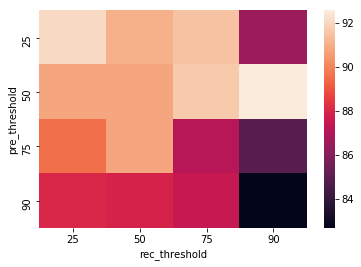

With instances sorted as True
With Early Stop set as True
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
5,True,True,shape,50,50,81.372619,87.883333,81.083333,87.783333,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
3,True,True,shape,25,90,79.235714,87.125000,77.416667,85.308333,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
9,True,True,shape,75,50,78.022619,86.675000,76.250000,83.883333,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
15,True,True,shape,90,90,77.761905,84.291667,77.333333,81.533333,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
8,True,True,shape,75,25,77.319048,87.125000,75.166667,82.308333,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
7,True,True,shape,50,90,77.251190,87.050000,74.833333,81.491667,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
6,True,True,shape,50,75,77.088095,84.125000,76.416667,81.866667,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
0,True,True,shape,25,25,76.564286,85.500000,74.333333,84.200000,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
1,True,True,shape,25,50,76.130952,82.000000,76.250000,81.050000,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
14,True,True,shape,90,75,75.800000,82.266667,75.500000,83.050000,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244


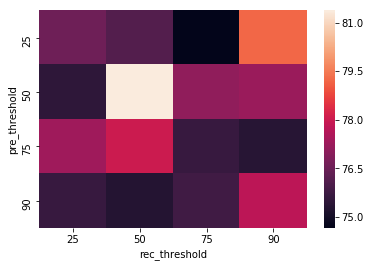

With instances sorted as True
With Early Stop set as False
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
14,True,False,shape,90,75,80.184524,89.466667,77.416667,83.458333,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
15,True,False,shape,90,90,79.032143,83.383333,80.000000,83.891667,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
10,True,False,shape,75,75,78.602381,87.291667,75.916667,84.341667,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
1,True,False,shape,25,50,77.359524,87.000000,75.166667,82.700000,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
13,True,False,shape,90,50,77.294048,82.383333,77.333333,83.533333,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
4,True,False,shape,50,25,76.251190,83.800000,75.333333,83.725000,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
5,True,False,shape,50,50,76.197619,82.166667,75.166667,80.758333,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
3,True,False,shape,25,90,75.965476,81.883333,76.083333,81.091667,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
9,True,False,shape,75,50,75.826190,81.291667,76.250000,82.216667,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
8,True,False,shape,75,25,75.125000,82.883333,73.666667,83.108333,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244


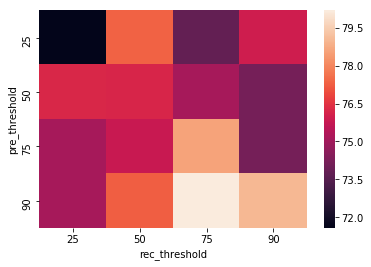

With instances sorted as False
With Early Stop set as True
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
10,False,True,shape,75,75,79.745238,88.875000,76.416667,84.966667,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
5,False,True,shape,50,50,79.165476,84.716667,77.833333,86.500000,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
4,False,True,shape,50,25,79.023810,88.416667,76.666667,84.341667,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
15,False,True,shape,90,90,78.545238,85.875000,75.833333,83.808333,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
2,False,True,shape,25,75,78.016667,86.000000,76.250000,83.750000,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
3,False,True,shape,25,90,77.895238,87.458333,75.000000,82.933333,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
7,False,True,shape,50,90,77.883333,86.166667,75.583333,84.600000,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
14,False,True,shape,90,75,77.550000,84.750000,76.583333,84.275000,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
1,False,True,shape,25,50,76.289286,82.591667,76.833333,81.891667,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
11,False,True,shape,75,90,76.045238,81.791667,75.583333,83.275000,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244


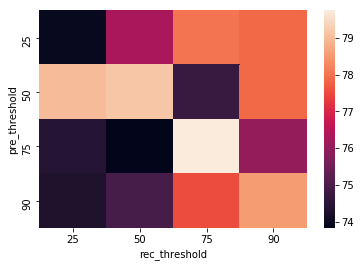

With instances sorted as False
With Early Stop set as False
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
11,False,False,shape,75,90,81.402381,89.375000,79.666667,85.858333,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
4,False,False,shape,50,25,78.745238,86.541667,77.250000,85.658333,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
2,False,False,shape,25,75,78.326190,84.958333,76.916667,85.958333,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
0,False,False,shape,25,25,78.119048,84.958333,76.583333,83.708333,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
14,False,False,shape,90,75,77.867857,83.133333,78.583333,84.566667,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
13,False,False,shape,90,50,77.802381,87.583333,75.333333,82.216667,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
9,False,False,shape,75,50,76.973810,85.333333,75.583333,83.583333,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
6,False,False,shape,50,75,76.929762,86.591667,74.333333,83.416667,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
1,False,False,shape,25,50,76.894048,85.775000,74.500000,85.016667,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244
8,False,False,shape,75,25,76.770238,86.258333,73.750000,83.075000,89.415572,17.978141,89.427033,3.624307,0.08614,23.947244


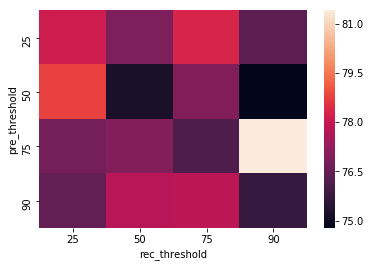

With instances sorted as True
With Early Stop set as True
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
14,True,True,object,90,75,73.200149,81.757812,70.156250,81.455729,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
7,True,True,object,50,90,72.921131,81.770833,69.739583,81.242188,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
3,True,True,object,25,90,72.633929,80.234375,70.442708,80.718750,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
2,True,True,object,25,75,72.603423,80.781250,69.817708,80.648438,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
12,True,True,object,90,25,72.240327,80.494792,69.687500,80.927083,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
4,True,True,object,50,25,72.215774,79.960938,70.494792,81.070312,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
13,True,True,object,90,50,71.997768,80.039062,69.583333,81.018229,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
10,True,True,object,75,75,71.741071,78.854167,70.442708,80.776042,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
9,True,True,object,75,50,71.736607,80.533854,68.593750,81.411458,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
6,True,True,object,50,75,71.481399,80.533854,68.645833,79.481771,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324


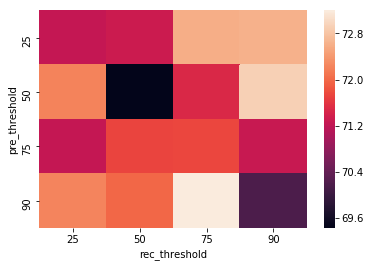

With instances sorted as True
With Early Stop set as False
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
6,True,False,object,50,75,72.257440,80.026042,70.260417,80.614583,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
7,True,False,object,50,90,72.232887,80.156250,69.817708,79.911458,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
4,True,False,object,50,25,72.017113,78.593750,70.260417,82.231771,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
3,True,False,object,25,90,71.941220,78.736979,70.546875,81.617188,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
11,True,False,object,75,90,71.938988,79.713542,69.427083,81.130208,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
0,True,False,object,25,25,71.885417,79.596354,70.364583,81.450521,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
9,True,False,object,75,50,71.843750,79.596354,69.635417,81.083333,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
12,True,False,object,90,25,71.706845,78.567708,70.833333,79.760417,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
15,True,False,object,90,90,71.497768,79.309896,69.218750,81.130208,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
5,True,False,object,50,50,71.229167,79.075521,68.645833,79.981771,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324


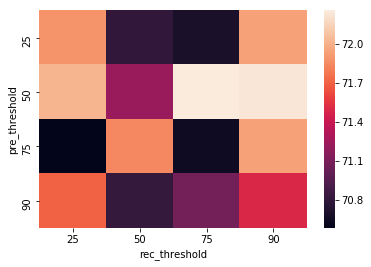

With instances sorted as False
With Early Stop set as True
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
9,False,True,object,75,50,72.834077,81.549479,70.208333,81.622396,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
5,False,True,object,50,50,72.469494,80.130208,70.312500,81.572917,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
11,False,True,object,75,90,72.443080,80.888021,69.843750,81.028646,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
13,False,True,object,90,50,72.348958,80.195312,69.973958,82.156250,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
12,False,True,object,90,25,72.194196,78.489583,70.546875,81.739583,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
3,False,True,object,25,90,72.125744,80.104167,69.557292,80.945312,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
0,False,True,object,25,25,71.628720,80.312500,68.567708,79.937500,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
4,False,True,object,50,25,71.601190,78.671875,69.817708,80.223958,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
1,False,True,object,25,50,71.311012,79.427083,68.697917,80.401042,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
6,False,True,object,50,75,71.160714,78.359375,69.479167,80.708333,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324


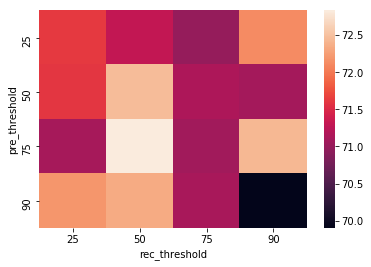

With instances sorted as False
With Early Stop set as False
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
4,False,False,object,50,25,72.484375,80.325521,69.817708,81.695312,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
5,False,False,object,50,50,72.407738,80.078125,70.260417,81.322917,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
6,False,False,object,50,75,72.180804,78.645833,70.807292,81.437500,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
10,False,False,object,75,75,72.155506,80.325521,69.921875,79.812500,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
14,False,False,object,90,75,72.073661,79.752604,70.364583,80.216146,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
12,False,False,object,90,25,71.873512,78.515625,70.234375,81.091146,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
7,False,False,object,50,90,71.870536,79.726562,69.635417,81.294271,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
1,False,False,object,25,50,71.796875,79.830729,69.635417,80.440104,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
0,False,False,object,25,25,71.505952,80.533854,68.229167,81.390625,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324
3,False,False,object,25,90,71.348958,79.830729,68.463542,80.666667,89.270241,9.164813,89.312434,2.562559,0.292389,16.516324


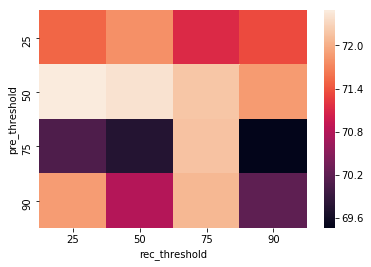

In [10]:
feature_types=["rgb","shape","object"]
early_stops=["True","False"]
instance_sorts=["True","False"]
All_Results=pd.DataFrame(Results.groupby(["instances_sorted",'early_stop','type','pre_threshold','rec_threshold']).mean().reset_index())
All_Results.to_csv("/Users/adithyabandi/Results.csv")
display()
for feature_type in feature_types:
    for instance_sort in instance_sorts:
        for early_stop in early_stops:
            print("With instances sorted as",instance_sort)
            print("With Early Stop set as",early_stop)
            print(feature_type,"results:")
            display_results(Results,feature_type,early_stop,instance_sort)